In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | amahai
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | santa lucia
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kabare
Processing Record 11 of Set 1 | puerto castilla
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | berlevag
Processing Record 15 of Set 1 | lima
Processing Record 16 of Set 1 | thaba-tseka
Processing Record 17 of Set 1 | rocha
Processing Record 18 of Set 1 | brae
Processing Record 19 of Set 1 | tigzirt
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 41 of Set 4 | nikolskoye
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | lastoursville
Processing Record 45 of Set 4 | zheleznodorozhnyy
Processing Record 46 of Set 4 | panama city
Processing Record 47 of Set 4 | gasa
Processing Record 48 of Set 4 | upernavik
Processing Record 49 of Set 4 | udachnyy
Processing Record 50 of Set 4 | pochutla
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | santa ana
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | skagastrond
City not found. Skipping...
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | bambari
Processing Record 7 of Set 5 | pemangkat
Processing Record 8 of Set 5 | bethel
Processing Record 9 of Set 5 | karlskrona
Processing Record 10 of Set 5 | acapulco
Processing Record 11 of Set 5 | banes
Processing Record 12 of Set 5 | glubokoe
City not found. Skipping...
Processing Record 13 of Set 5 | ndjole
Proces

Processing Record 26 of Set 8 | grindavik
Processing Record 27 of Set 8 | boddam
Processing Record 28 of Set 8 | cidreira
Processing Record 29 of Set 8 | dikson
Processing Record 30 of Set 8 | port hawkesbury
Processing Record 31 of Set 8 | mercedes
Processing Record 32 of Set 8 | gelgaudiskis
Processing Record 33 of Set 8 | huarmey
Processing Record 34 of Set 8 | taseyevo
Processing Record 35 of Set 8 | edson
Processing Record 36 of Set 8 | chippewa falls
Processing Record 37 of Set 8 | jhargram
Processing Record 38 of Set 8 | kaeo
Processing Record 39 of Set 8 | riachao
Processing Record 40 of Set 8 | severo-kurilsk
Processing Record 41 of Set 8 | tartagal
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | baraki barak
Processing Record 44 of Set 8 | dodoma
Processing Record 45 of Set 8 | manakara
Processing Record 46 of Set 8 | christchurch
Processing Record 47 of Set 8 | west fargo
Processing Record 48 of Set 8 | winsum
Processing Record 49 of Set 8 | liusha
Proc

Processing Record 13 of Set 12 | corpus christi
Processing Record 14 of Set 12 | strezhevoy
Processing Record 15 of Set 12 | guerrero negro
Processing Record 16 of Set 12 | buariki
City not found. Skipping...
Processing Record 17 of Set 12 | phangnga
Processing Record 18 of Set 12 | manzanillo
Processing Record 19 of Set 12 | dunmore
Processing Record 20 of Set 12 | matamoros
Processing Record 21 of Set 12 | oussouye
Processing Record 22 of Set 12 | totness
Processing Record 23 of Set 12 | veraval
Processing Record 24 of Set 12 | harpanahalli
Processing Record 25 of Set 12 | kamaishi
Processing Record 26 of Set 12 | college place
Processing Record 27 of Set 12 | hokitika
Processing Record 28 of Set 12 | nerja
Processing Record 29 of Set 12 | bay roberts
Processing Record 30 of Set 12 | shu
Processing Record 31 of Set 12 | gravdal
Processing Record 32 of Set 12 | ambilobe
Processing Record 33 of Set 12 | maniitsoq
Processing Record 34 of Set 12 | svetlogorsk
Processing Record 35 of Set 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amahai,-3.3333,128.9167,77.79,83,100,2.13,ID,2022-08-03 23:17:54
1,Santa Lucia,27.9117,-15.5407,66.76,78,20,28.77,ES,2022-08-03 23:17:54
2,Butaritari,3.0707,172.7902,81.54,77,90,16.17,KI,2022-08-03 23:12:13
3,Mahebourg,-20.4081,57.7000,68.29,77,40,9.22,MU,2022-08-03 23:16:34
4,Codrington,-38.2667,141.9667,51.66,82,12,18.16,AU,2022-08-03 23:12:13
5,Busselton,-33.6500,115.3333,52.48,72,90,16.98,AU,2022-08-03 23:11:03
6,Ushuaia,-54.8000,-68.3000,37.06,87,40,3.44,AR,2022-08-03 23:12:15
7,Punta Arenas,-53.1500,-70.9167,39.31,87,100,13.80,CL,2022-08-03 23:12:25
8,Kabare,-2.4683,28.8242,62.56,84,98,0.87,CD,2022-08-03 23:17:55
9,Puerto Castilla,16.0167,-85.9667,82.63,78,100,18.14,HN,2022-08-03 23:17:56


In [26]:
# Fix the column header order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amahai,ID,2022-08-03 23:17:54,-3.3333,128.9167,77.79,83,100,2.13
1,Santa Lucia,ES,2022-08-03 23:17:54,27.9117,-15.5407,66.76,78,20,28.77
2,Butaritari,KI,2022-08-03 23:12:13,3.0707,172.7902,81.54,77,90,16.17
3,Mahebourg,MU,2022-08-03 23:16:34,-20.4081,57.7000,68.29,77,40,9.22
4,Codrington,AU,2022-08-03 23:12:13,-38.2667,141.9667,51.66,82,12,18.16
5,Busselton,AU,2022-08-03 23:11:03,-33.6500,115.3333,52.48,72,90,16.98
6,Ushuaia,AR,2022-08-03 23:12:15,-54.8000,-68.3000,37.06,87,40,3.44
7,Punta Arenas,CL,2022-08-03 23:12:25,-53.1500,-70.9167,39.31,87,100,13.80
8,Kabare,CD,2022-08-03 23:17:55,-2.4683,28.8242,62.56,84,98,0.87
9,Puerto Castilla,HN,2022-08-03 23:17:56,16.0167,-85.9667,82.63,78,100,18.14


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

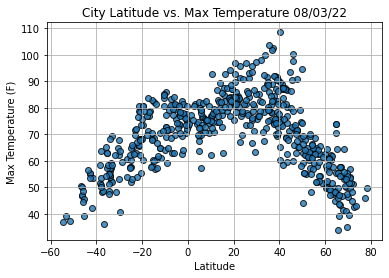

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

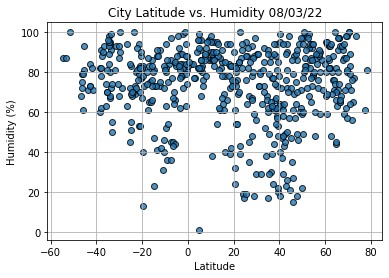

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

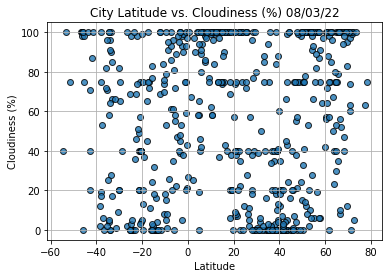

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

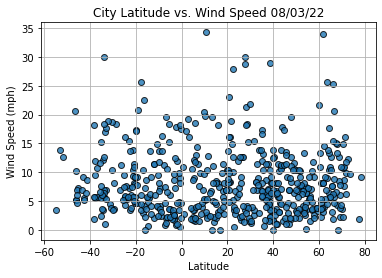

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                  Thaba-Tseka
Country                        LS
Date          2022-08-03 23:17:57
Lat                       -29.522
Lng                       28.6084
Max Temp                    40.84
Humidity                       90
Cloudiness                     65
Wind Speed                   3.62
Name: 13, dtype: object

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

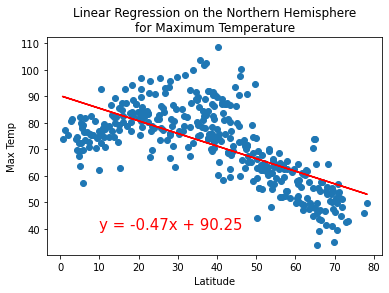

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

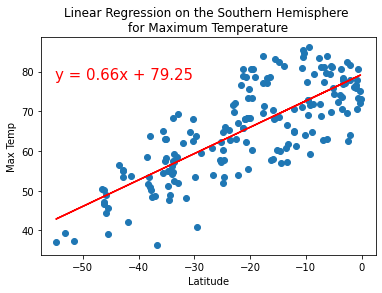

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-55,78))

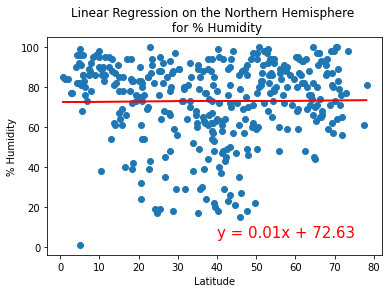

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,5))

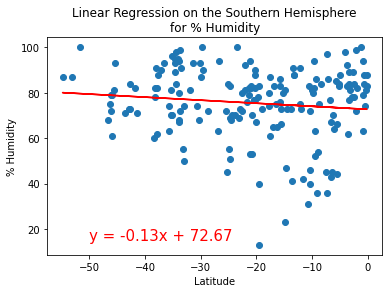

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

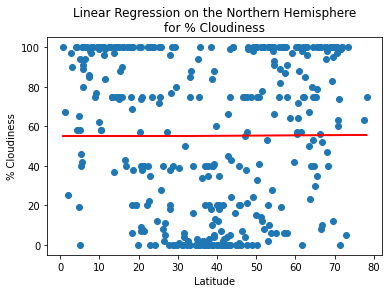

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

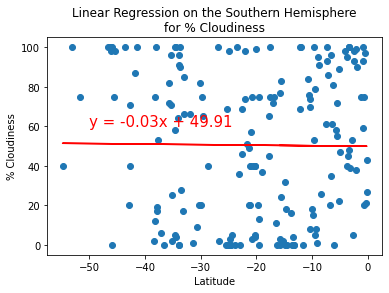

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

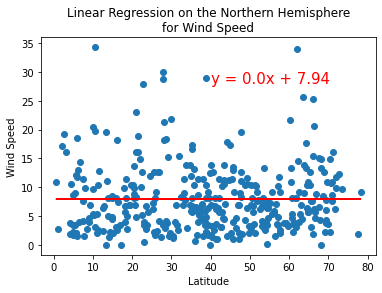

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,28))

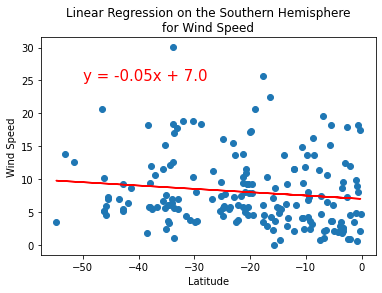

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,25))